In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.ensemble import RandomForestClassifier #随机森林在ensemble模块下，这里是分类器
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #划分测试集与分类集
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn import metrics
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_file = "./stressSensorGait_dataset/abnormal_gait.csv"
gait = pd.read_csv(dataset_file)


x=gait.iloc[:,[0,1,2,3]]
y=gait.iloc[:,[4]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
xtrain.values
xtest.values
ytrain=ytrain.values.ravel()
ytest=ytest.values.ravel()

In [4]:
#定义分类器
classifier1 = RandomForestClassifier()
#随机森林参数
parameters1 = {'n_estimators': [10,20,30,60,100], 
              'max_depth': [9,12,15,20], 
              'max_features' : ['auto', 'log2']
             }
#随机森林模型训练
clf = GridSearchCV(classifier1, parameters1, cv=10)#10倍交叉验证
clf.fit(xtrain, ytrain)
print("最优的模型参数:",clf.best_params_)

最优的模型参数: {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 60}


In [5]:
#随机森林在测试集准确率
ypred_test=clf.predict(xtest)
accuracy_test=accuracy_score(ytest,ypred_test)
print('随机森林测试集准确率：',accuracy_test)

#随机森林在训练集准确率
ypred_train=clf.predict(xtrain)
accuracy_train=accuracy_score(ytrain,ypred_train)
print('随机森林训练集准确率：',accuracy_train)

随机森林测试集准确率： 0.9393939393939394
随机森林训练集准确率： 1.0


In [6]:
#画图
labels = ["normal","parkinson","right hemiplegia", "left hemiplegia"]
y_true=ytest


matrix1 = metrics.confusion_matrix(ypred_test, y_true)

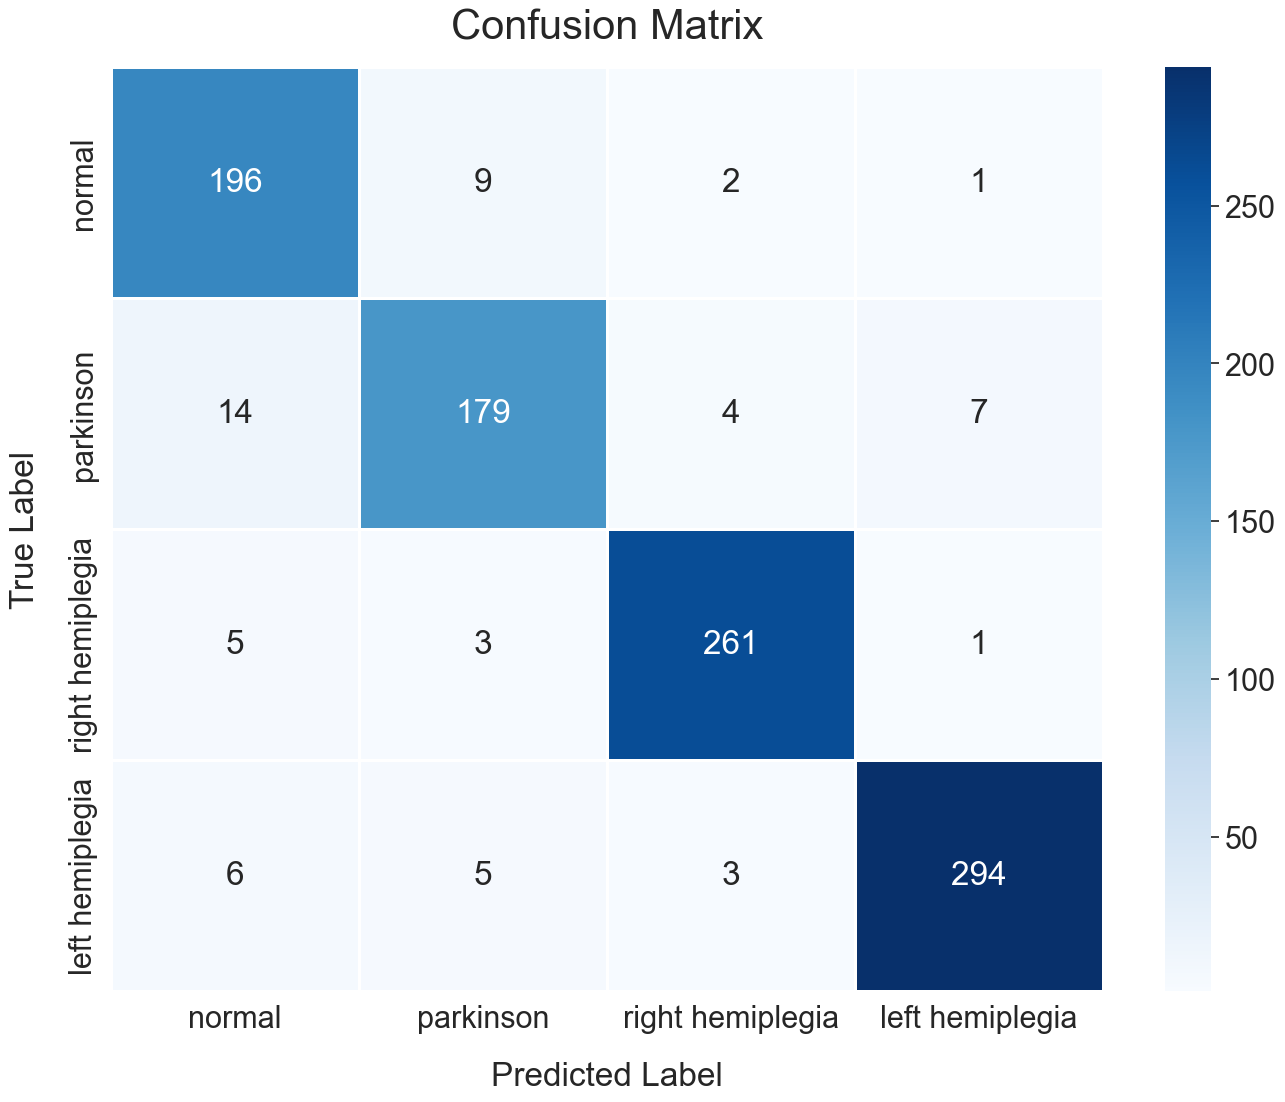

In [8]:
plt.figure(figsize=(16, 12))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.set(font_scale=2)
sns.heatmap(matrix1,
            
            cmap="Blues",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")

plt.title("Confusion Matrix",fontdict={'size': 30},pad=20)
plt.ylabel("True Label",fontdict={'size': 24},labelpad=20)
plt.xlabel("Predicted Label",fontdict={'size': 24},labelpad=20)

imagePath1 = './image/rfAbnormalGaitConfusionMatrix.jpg'
plt.savefig(imagePath1, dpi=500, bbox_inches = 'tight') #保存图片
plt.show()

## 决策树

In [9]:
#定义分类器
classifier2 = DecisionTreeClassifier()
#决策树参数
parameters2 = {'criterion':['gini'],
               'class_weight':['balanced'],
                'max_depth':[5,10,20],
               'min_samples_leaf':[1,2,3,5,10],
              }
#决策树模型训练
rfc = GridSearchCV(classifier2, parameters2, cv=10)
rfc.fit(xtrain, ytrain)
print("最优的模型参数:",rfc.best_params_)

最优的模型参数: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}


In [10]:
ypred_train2 = rfc.predict(xtrain)
accuracy_train2 = accuracy_score(ytrain,ypred_train2)
print('决策树训练集准确率：',accuracy_train2)

ypred_test2 = rfc.predict(xtest)
accuracy_test2 = accuracy_score(ytest,ypred_test2)
print('决策树测试集准确率：',accuracy_test2)

决策树训练集准确率： 0.9696663296258847
决策树测试集准确率： 0.9181818181818182


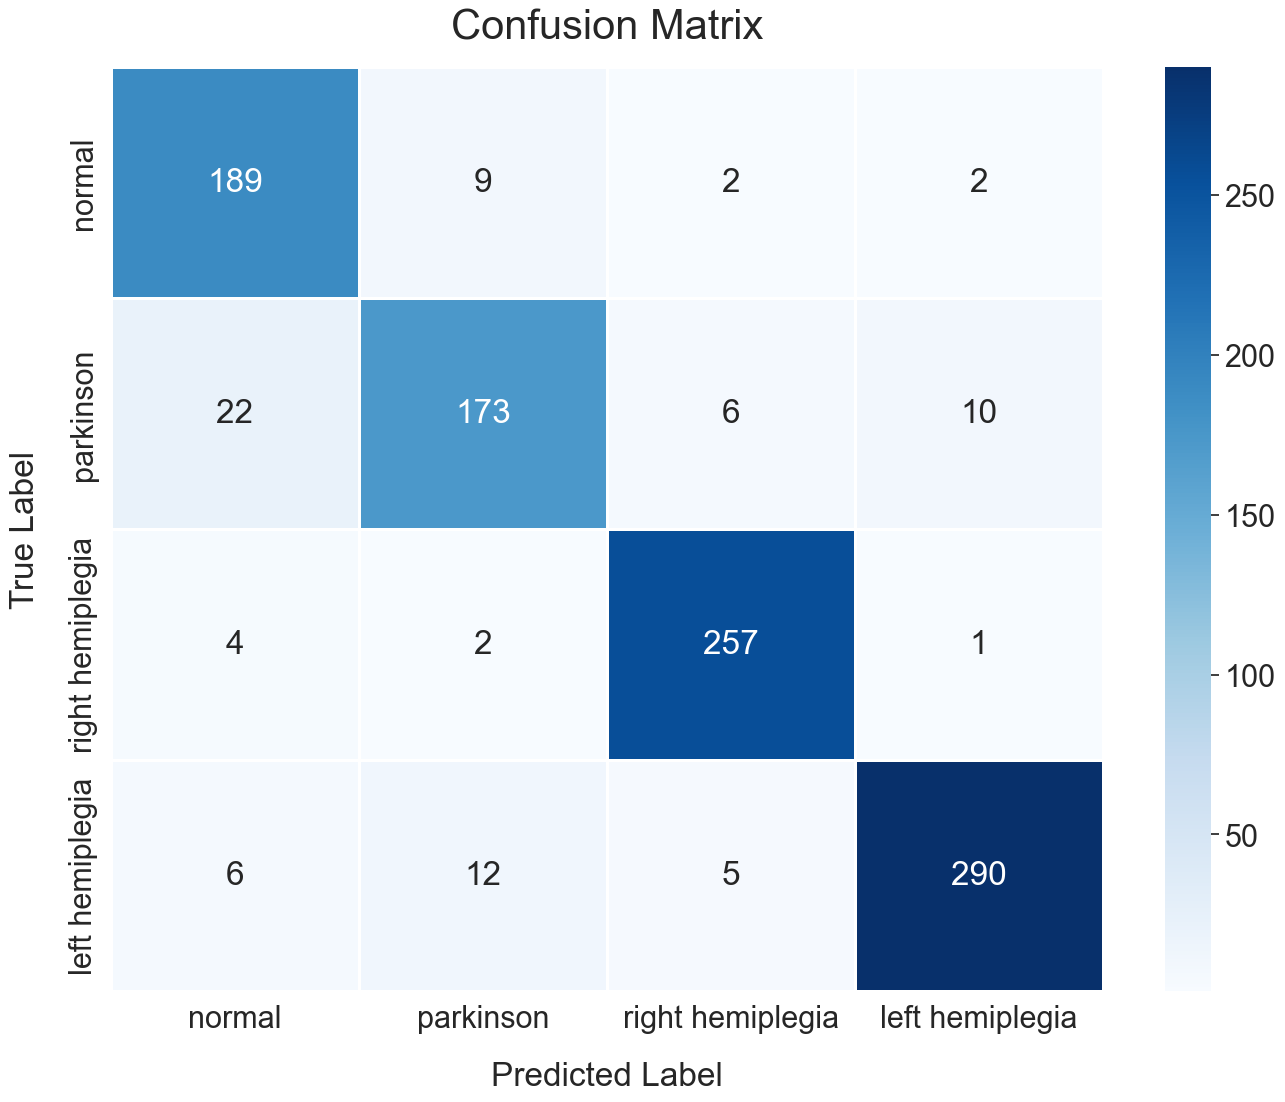

In [11]:
#画图
matrix2 = metrics.confusion_matrix(ypred_test2, y_true)

plt.figure(figsize=(16, 12))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.set(font_scale=2)
sns.heatmap(matrix2,
            
#             cmap="coolwarm",
            cmap="Blues",
         
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")
plt.title("Confusion Matrix",fontdict={'size': 30},pad=20)
plt.ylabel("True Label",fontdict={'size': 24},labelpad=20)
plt.xlabel("Predicted Label",fontdict={'size': 24},labelpad=20)

imagePath2 = './image/dtAbnormalGaitConfusionMatrix.jpg'
plt.savefig(imagePath2, dpi=500, bbox_inches = 'tight') #保存图片
plt.show()